<a href="https://colab.research.google.com/github/onedayxzn/Sistem-Pendeteksi-Dini-Diabetes/blob/model-ML/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
!pip install opendatasets

In [143]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [144]:
od.download('https://www.kaggle.com/mathchi/diabetes-data-set')

Skipping, found downloaded files in "./diabetes-data-set" (use force=True to force download)


In [145]:
df = pd.read_csv('diabetes-data-set/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [147]:
df.shape

(768, 9)

In [148]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [149]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [150]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [151]:
print('Jumlah baris yang memiliki nilai 0 pada Glukosa: {0}'.format(len(df.loc[df['Glucose'] == 0])))
print('Jumlah baris yang memiliki nilai 0 pada BMI: {0}'.format(len(df.loc[df['BMI'] == 0])))
print('Jumlah baris yang memiliki nilai 0 pada Tekanan Darah: {0}'.format(len(df.loc[df['BloodPressure'] == 0])))
print('Jumlah baris yang memiliki nilai 0 pada Insulin: {0}'.format(len(df.loc[df['Insulin'] == 0])))
print('Jumlah baris yang memiliki nilai 0 pada Umur: {0}'.format(len(df.loc[df['Age'] == 0])))
print('Jumlah baris yang memiliki nilai 0 pada Ketebalan Kulit: {0}'.format(len(df.loc[df['SkinThickness'] == 0])))
print('Jumlah baris yang memiliki nilai 0 pada Diabetes Pedigree Function: {0}'.format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))


Jumlah baris yang memiliki nilai 0 pada Glukosa: 5
Jumlah baris yang memiliki nilai 0 pada BMI: 11
Jumlah baris yang memiliki nilai 0 pada Tekanan Darah: 35
Jumlah baris yang memiliki nilai 0 pada Insulin: 374
Jumlah baris yang memiliki nilai 0 pada Umur: 0
Jumlah baris yang memiliki nilai 0 pada Ketebalan Kulit: 227
Jumlah baris yang memiliki nilai 0 pada Diabetes Pedigree Function: 0


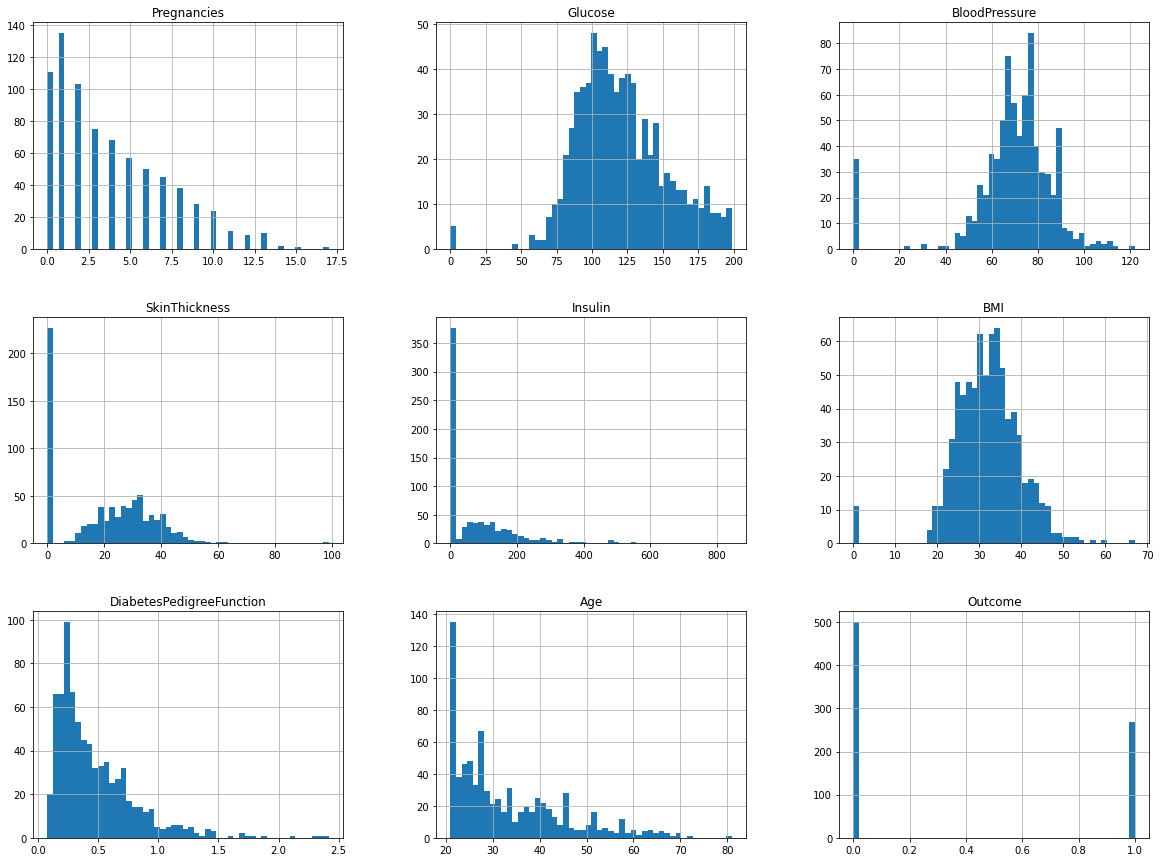

In [152]:
df.hist(bins=50, figsize=(20,15))
plt.show()

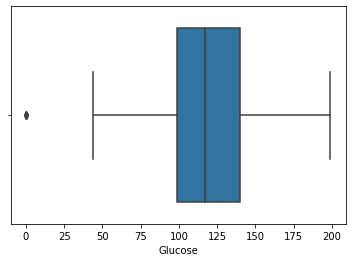

In [153]:
sns.boxplot(x=df['Glucose'])

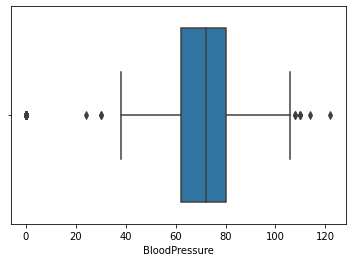

In [154]:
sns.boxplot(x=df['BloodPressure'])

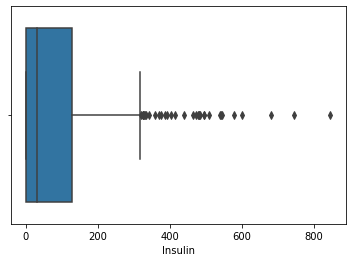

In [155]:
sns.boxplot(x=df['Insulin'])

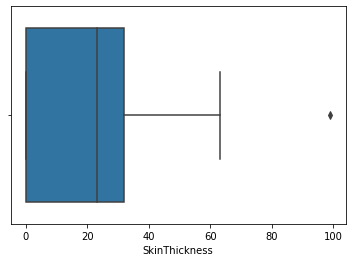

In [156]:
sns.boxplot(x=df['SkinThickness'])

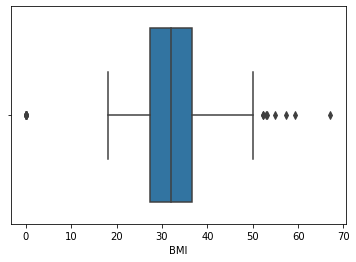

In [157]:
sns.boxplot(x=df['BMI'])

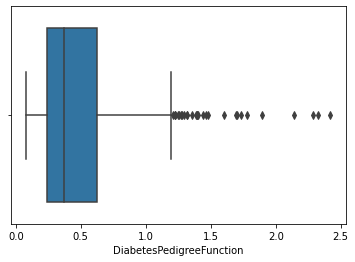

In [158]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

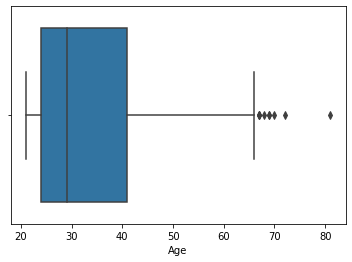

In [159]:
sns.boxplot(x=df['Age'])

In [160]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [161]:
outcol=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
for i in outcol:
    df[i]=df[i].replace(0,np.mean(sorted(df[i])))

In [162]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [163]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df.shape

(619, 9)

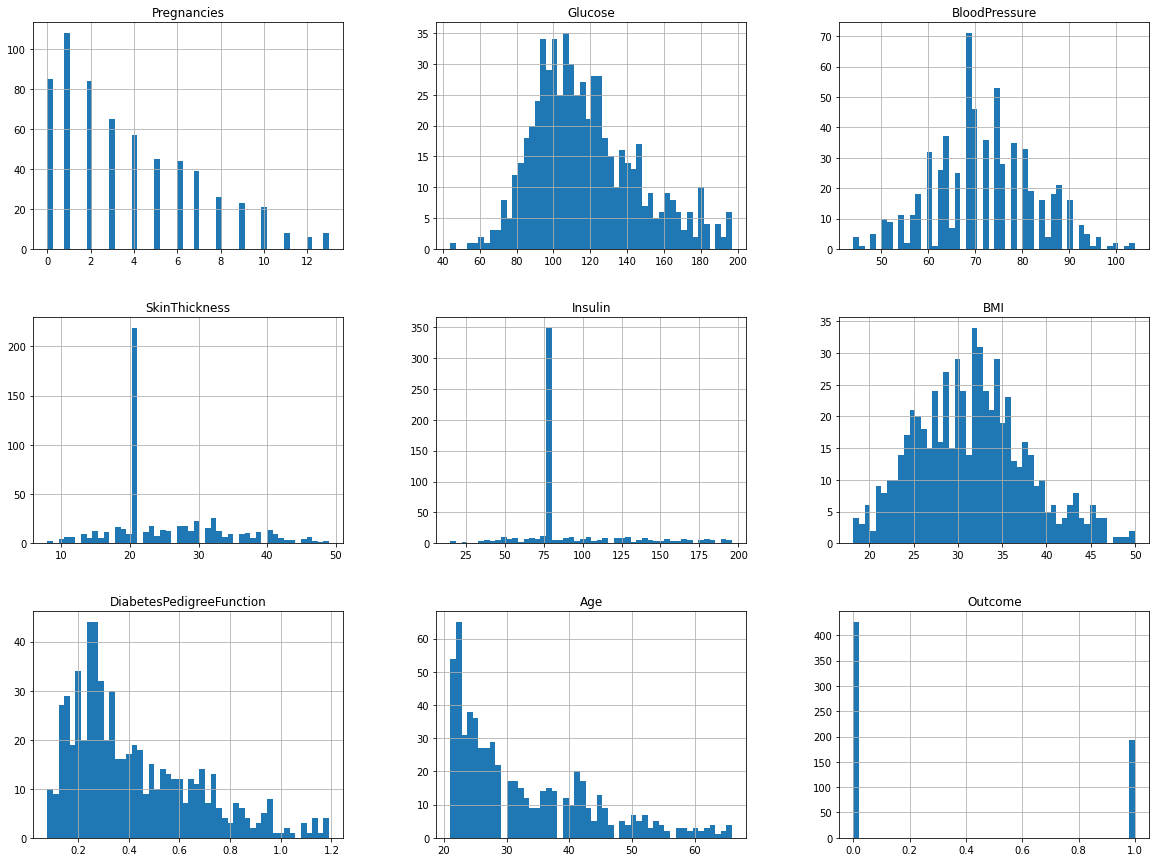

In [164]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [165]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [166]:
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_features = ['Outcome']

   jumlah sampel  persentase
0            426        68.8
1            193        31.2


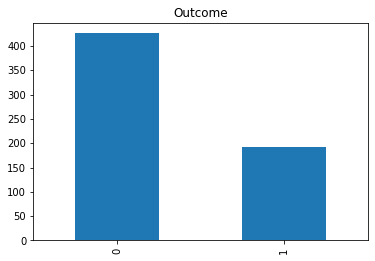

In [167]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);